In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

import numpy as np

2024-01-31 18:58:49.601357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 18:58:49.601510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 18:58:49.802301: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
clothing_model = "/kaggle/input/my-clothing-model-tflite/tensorflow2/model_for_learning/1/xception_v4_1_epoch_11_val_accuracy_0.889.h5"

In [6]:
model = keras.models.load_model(clothing_model)

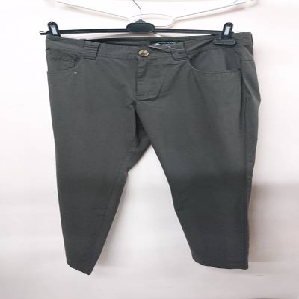

In [7]:
image = "/kaggle/input/clothing-dataset-small-master/clothing-dataset-small-master/test/pants/046d0a65-f5a6-47f6-afaf-e692bfcfcb00.jpg"
img = load_img(image, target_size=(299, 299))
img

In [8]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

preds = model.predict(X)
preds

1/1 [==============================] - 1s 1s/step


array([[-3.6435118 , -3.0070777 , -3.0574422 , -3.5082903 ,  7.592174  ,
        -3.433438  , -3.8906763 ,  4.028007  , -0.25207046, -1.9659504 ]],
      dtype=float32)

In [9]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

dict(zip(classes, preds[0]))

{'dress': -3.6435118,
 'hat': -3.0070777,
 'longsleeve': -3.0574422,
 'outwear': -3.5082903,
 'pants': 7.592174,
 'shirt': -3.433438,
 'shoes': -3.8906763,
 'shorts': 4.028007,
 'skirt': -0.25207046,
 't-shirt': -1.9659504}

**Converting Tensorflow model to Tensorflow Lite**

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tf_lite_model = converter.convert()

with open('clothing_model.tflite', 'wb') as f_out:
  f_out.write(tf_lite_model)

Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 125, Total Ops 232, % non-converted = 53.88 %
 * 125 ARITH ops

- arith.constant:  125 occurrences  (f32: 124, i32: 1)



  (f32: 12)
  (f32: 40)
  (f32: 34)
  (f32: 2)
  (f32: 4)
  (f32: 1)
  (f32: 11)


In [11]:
!ls -lh

total 81M
-rw-r--r-- 1 root root 81M Jan 31 18:59 clothing_model.tflite


**Use the Model**

In [12]:
import tensorflow.lite as tflite

In [13]:
interpreter = tflite.Interpreter(model_path = 'clothing_model.tflite' )
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [14]:
interpreter.set_tensor(input_index , X)

interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [15]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

dict(zip(classes, preds[0]))

{'dress': -3.6435122,
 'hat': -3.0070791,
 'longsleeve': -3.0574453,
 'outwear': -3.5082927,
 'pants': 7.5921755,
 'shirt': -3.4334383,
 'shoes': -3.8906794,
 'shorts': 4.02801,
 'skirt': -0.25207078,
 't-shirt': -1.9659523}

remove TF dependency

In [16]:
from PIL import Image


In [17]:
with Image.open(image) as img:
    img = img.resize((299 , 299) , Image.NEAREST)

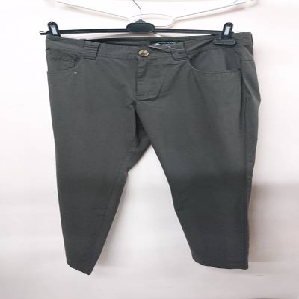

In [18]:
img

In [19]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [21]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [23]:
interpreter.set_tensor(input_index , X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [24]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

dict(zip(classes, preds[0]))

{'dress': -3.6435122,
 'hat': -3.0070791,
 'longsleeve': -3.0574453,
 'outwear': -3.5082927,
 'pants': 7.5921755,
 'shirt': -3.4334383,
 'shoes': -3.8906794,
 'shorts': 4.02801,
 'skirt': -0.25207078,
 't-shirt': -1.9659523}

In [27]:
! pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 35.8 MB/s eta 0:00:00a 0:00:01


In [28]:
import tflite_runtime.interpreter as tflite

In [29]:
# load the model
interpreter = tflite.Interpreter(model_path="clothing_model.tflite")
# load the weights (in keras this is automatically)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [30]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [31]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [32]:
dict(zip(classes, preds[0]))


{'dress': -3.6435125,
 'hat': -3.0070794,
 'longsleeve': -3.0574455,
 'outwear': -3.508292,
 'pants': 7.5921755,
 'shirt': -3.4334383,
 'shoes': -3.8906791,
 'shorts': 4.02801,
 'skirt': -0.2520709,
 't-shirt': -1.9659525}